## Artificial Neural Network

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
# Remove unwanted columns from our dataset
data = data.drop(["GENDER", "AGE"], axis=1)
data.head()

,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [4]:
# Divide the dataset into predictors and target variable

# Predictors
X = data.drop(["DIAGNOSIS"], axis=1)

# Target variable
y = data["DIAGNOSIS"] 

## Divide data into training and testing parts

In [5]:
# In this case we will be testing on 30% of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training the model

In [29]:
model = Sequential()

# Add hidden layers
model.add(Dense(32, input_dim=13, activation="relu"))
model.add(Dense(8, activation="relu"))

model.add(Dropout(0.5))

# Add an output layer with 1 neuron (binary)
model.add(Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.30)

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 0.9095 - accuracy: 0.3311 - val_loss: 0.7890 - val_accuracy: 0.4308
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7451 - accuracy: 0.4702 - val_loss: 0.6339 - val_accuracy: 0.6615
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.5629 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5967 - accuracy: 0.6159 - val_loss: 0.4806 - val_accuracy: 0.8615
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.7351 - val_loss: 0.4325 - val_accuracy: 0.8769
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.7219 - val_loss: 0.3981 - val_accuracy: 0.8923
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5462 - accuracy: 0.8013 - val_loss: 0.3791 - val_accuracy: 0.8923
Epoch 8/50
16/16 [=

## Evaluating the model

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

10/10 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9320
Loss: 0.2154
Accuracy: 0.9320


In [31]:
# Make predictions
predictions = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [32]:
# Convert predicted probabilities into binary
predictions = (predictions > 0.5)*1

In [33]:
scores = model.evaluate(X_test, y_test)
print(scores)

3/3 [==============================] - 0s 3ms/step - loss: 0.1675 - accuracy: 0.9570
[0.16749294102191925, 0.9569892287254333]


In [34]:
score = accuracy_score(y_test, predictions)
score

0.956989247311828

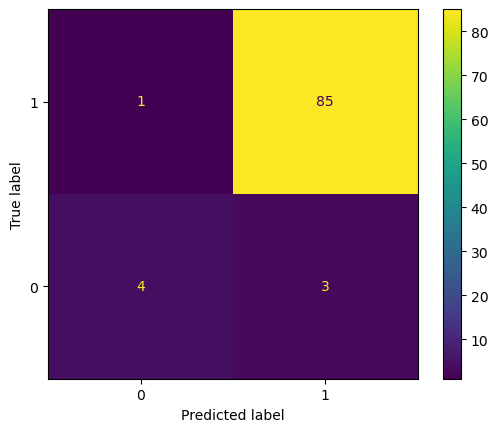

In [35]:
cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

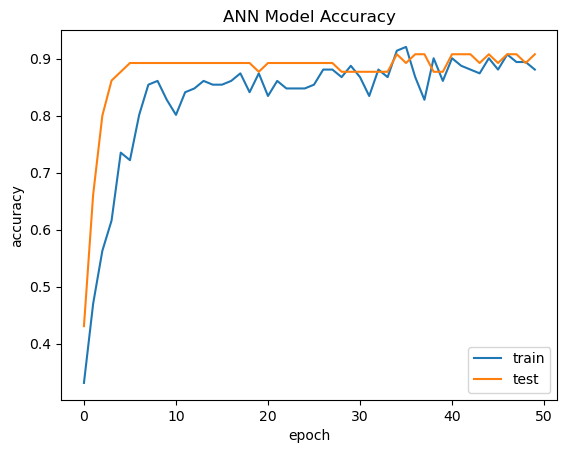

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("ANN Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")
plt.show()

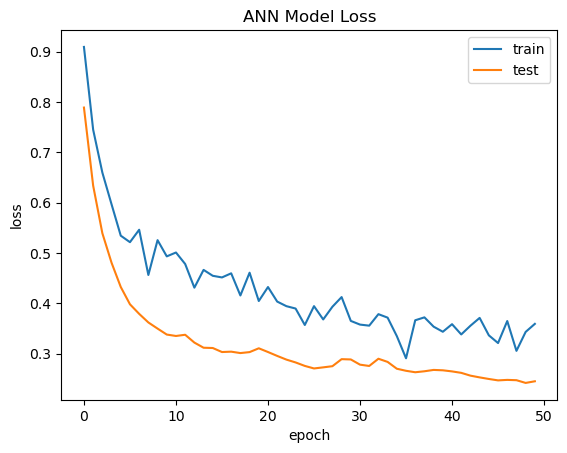

In [37]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("ANN Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()